The diffusion coefficient for monoclinic 3x3x3 @400k is 6.41538371411645e-11 m^2/s
The diffusion coefficient for triclinic 3x3x3 @400k is 5.6015531574377786e-11 m^2/s
The conductivity for monoclinic 3x3x3 @400k is 0.0464665154910683 S/cm
The conductivity for triclinic 3x3x3 @400k is 0.039296761637375145 S/cm


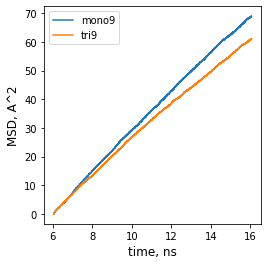

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Import MSD files as lists:
step, mono = np.loadtxt('mono/400k/monoclinic_9x9x9_400_li.txt', skiprows=2, unpack=True)
step, tri = np.loadtxt('tri/400k/triclinic_9x9x9_400_li.txt', skiprows=2, unpack=True)

steps = step / 1000000

mono = mono - mono[1]
tri = tri - tri[1]

# Plot MSD:   
plt.plot(steps[1:], mono[1:])
plt.plot(steps[1:], tri[1:])

plt.xlabel('time, ns', size = 12)
plt.ylabel('MSD, A^2', size = 12)
#plt.ylim(0, 4.8)
plt.legend(['mono9', 'tri9'])

# Find diffusion coefficient:
mono_slope, mono_intercept = np.polyfit(steps[6000:], mono[6000:], 1)
mono_slope_standard_400 = float(mono_slope * (10 ** (-11)))
tri_slope, tri_intercept = np.polyfit(steps[6000:], tri[6000:], 1)
tri_slope_standard_400 = float(tri_slope * (10 ** (-11)))

#mono_fitted = []
#tri_fitted =[]

#for s in steps[6000:]:
#    mono_fitted.append(s * mono_slope + mono_intercept)
#    tri_fitted.append(s * tri_slope + tri_intercept)

#plt.plot(steps[6000:], mono_fitted)
#plt.plot(steps[6000:], tri_fitted)

print(f'The diffusion coefficient for monoclinic 3x3x3 @400k is {mono_slope_standard_400} m^2/s')
print(f'The diffusion coefficient for triclinic 3x3x3 @400k is {tri_slope_standard_400} m^2/s')

mono_cond = (((1.602 * 10**(-19))**2 * (1.559 * 10**(28)) * mono_slope_standard_400)/((1.381 * 10**(-23)) * 400) * 10**(-2))
tri_cond = (((1.602 * 10**(-19))**2 * (1.510 * 10**(28)) * tri_slope_standard_400)/((1.381 * 10**(-23)) * 400) * 10**(-2))

print(f'The conductivity for monoclinic 3x3x3 @400k is {mono_cond} S/cm')
print(f'The conductivity for triclinic 3x3x3 @400k is {tri_cond} S/cm')

# Conversion of diffusion coefficient to conductivity as follows:
# conducitivity = (charge**2 * charge carrier concentration * diffusion coefficient) / boltzmann constant * temperature
#
# charge is electron charge (sodium singularly charged), so 1.602 * 10**(-19) C
#
# charge carrier concentration calculated as number of Li/Sc/Cl ions in the simulation cell/cell dimensions
#
# diffusion coefficient calcualted as above fromm MSD plot slopes
#
# boltzmann constant = 1.381 * 10**(-23) J/K
#
# temperature varies with experiment
#
# !!! 10**(-2) added to get final results in S/cm as conventionally displayed

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('msd_9_400.jpg', bbox_inches='tight', dpi=500)